In [136]:
import numpy as np
from scipy import signal 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

$\tau\frac{dy}{dt} = -y+K_p u$

In [137]:
Kp = 3
taup = 2.0 

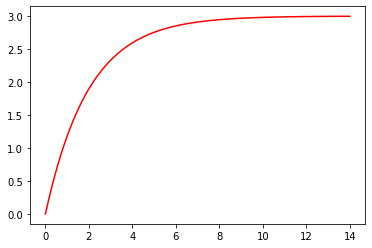

In [138]:
num = [Kp]
den = [taup,1]
sys = signal.TransferFunction(num,den)
t2, y2 =signal.step(sys)
plt.figure(1)
plt.plot(t2,y2,'r-')

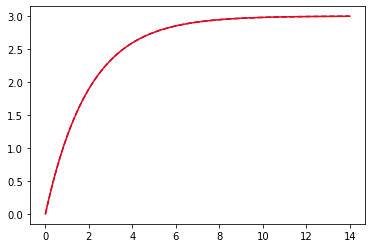

In [139]:
def model(y, t):
    u = 1
    return (-y + Kp * u)/taup
t1 = np.linspace(0,14,100)
y1 = odeint(model,0,t1)
plt.figure(1)
plt.plot(t1,y1,'b--')
plt.plot(t2,y2,'r-')

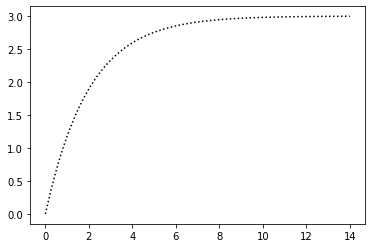

In [140]:
A = -1.0/taup
B = Kp/taup
C = 1.0
D = 0.0
sys3 = signal.StateSpace(A,B,C,D)
t3, y3 = signal.step(sys3)
plt.plot(t3,y3,'k:')


In [141]:
from scipy.fftpack import fft, ifft

In [142]:
def function_gen(x, a, b, c, d):
    y1 = a*x**2 +b*x+c
    y2 = d*x**3 + c*x**2 + b*x+a
    return y1, y2

In [143]:
x = np.linspace(0,10,100)

In [144]:
a = np.random.normal(8,1.5,100)
b = np.random.normal(2,2,100)
c = np.random.normal(4,1,100)
d = np.random.normal(0,0.5,100)

y1, y2 = function_gen(x, a,b,c,d)

array([5.65457788, 3.58594856, 3.1810974 , 3.82792143, 4.32552674,
       5.43511675, 4.50818645, 3.79588998, 3.47032046, 3.05756866,
       5.51835305, 1.70188244, 5.98683531, 3.15647575, 4.09315473,
       3.72641122, 5.00655104, 5.78907418, 4.20042206, 3.72833989,
       3.4780365 , 5.4488644 , 4.66040257, 3.01092914, 2.2932667 ,
       3.29470077, 4.87577866, 5.26114337, 4.42100924, 4.62984374,
       3.54155186, 3.88799697, 4.20428681, 5.37198434, 4.88145456,
       4.52782614, 3.82497146, 3.40848252, 5.53032896, 5.76107011,
       6.91004395, 4.34717243, 4.1944161 , 3.96135438, 3.39972308,
       3.31684563, 4.06182415, 2.19512094, 5.0702546 , 3.39997578,
       3.73732873, 4.48159596, 1.86278611, 3.1533519 , 4.67976194,
       3.97208056, 2.77675411, 4.39003442, 2.34650216, 5.39653416,
       3.04610808, 3.52932923, 4.71457269, 2.58475461, 2.21770991,
       3.85439999, 3.48957933, 3.65606282, 4.01654463, 4.2979871 ,
       2.91431928, 4.03600595, 4.16773036, 4.74895063, 3.73131

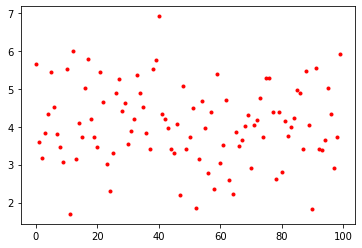

In [145]:
plt.plot(c,'r.')
c

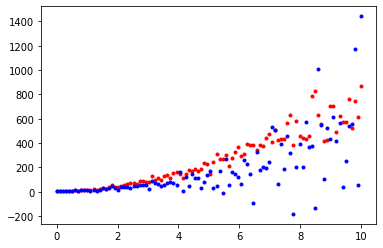

In [146]:
plt.plot(x,y1,'r.')
plt.plot(x,y2,'b.')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


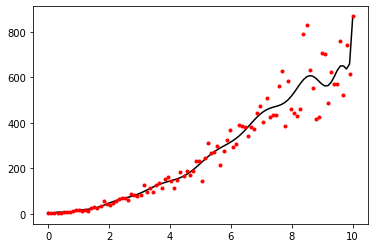

In [147]:
reg1 = np.polyfit(x,y1,20)
ry1 = np.polyval(reg1,x)
plt.plot(x,ry1,'k-')
plt.plot(x,y1,'r.')

In [148]:
reg1

array([-2.79587111e-09,  2.46714324e-07, -9.63487601e-06,  2.15777400e-04,
       -2.93968025e-03,  2.17846003e-02,  2.48691893e-04, -2.06881622e+00,
        2.72640450e+01, -2.09611938e+02,  1.11311837e+03, -4.28125849e+03,
        1.20796756e+04, -2.48975913e+04,  3.68618229e+04, -3.80523013e+04,
        2.61331607e+04, -1.10795790e+04,  2.55302688e+03, -2.37087218e+02,
        6.98252013e+00])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


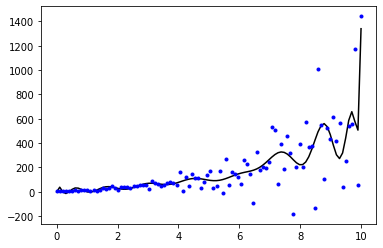

In [149]:
reg2 = np.polyfit(x,y2,20)
ry2 = np.polyval(reg2,x)
plt.plot(x,ry2,'k-')
plt.plot(x,y2,'b.')

In [150]:
reg2


array([ 3.60475782e-08, -2.99395086e-06,  1.10337098e-04, -2.33513820e-03,
        2.99979572e-02, -2.05338076e-01, -1.64497328e-01,  2.07717339e+01,
       -2.56896323e+02,  1.90204854e+03, -9.82466018e+03,  3.70028724e+04,
       -1.02796082e+05,  2.09548887e+05, -3.07803571e+05,  3.15476366e+05,
       -2.14317258e+05,  8.88259469e+04, -1.94074885e+04,  1.63009418e+03,
       -1.41527085e+00])

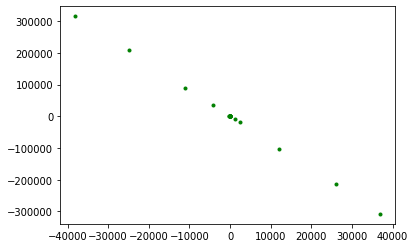

In [162]:
plt.plot(reg1,reg2,'g.')


In [152]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import imageio

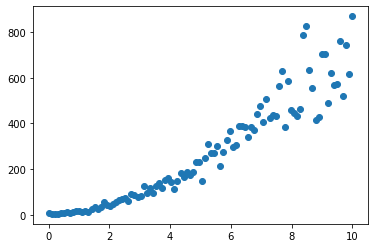

In [153]:
plt.scatter(x,y1,marker = 'o')

In [154]:
x1 = torch.from_numpy(x)
y11 = torch.from_numpy(y1)
x1=x1.double()


In [155]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
    

In [156]:
net = Net(n_feature=100, n_hidden=3, n_output=100)     # define the network

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
net = net.double()

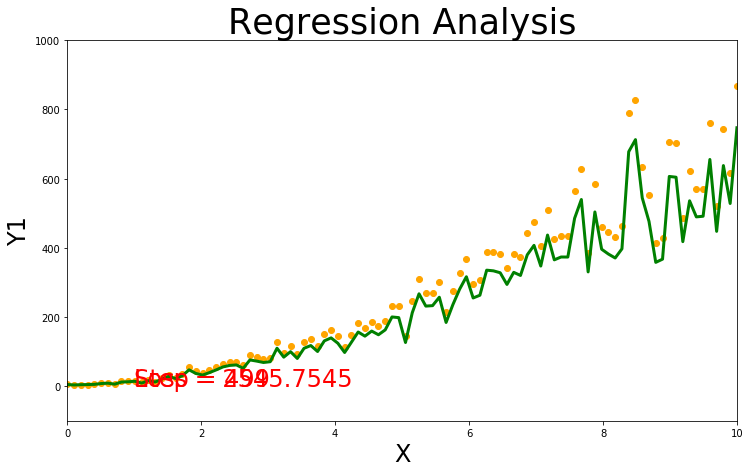

In [157]:
my_images = []
fig, ax = plt.subplots(figsize=(12,7))

for t in range(500):
  
    
    predication = net(x1)
    loss = loss_func(predication,y11)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('X', fontsize=24)
    ax.set_ylabel('Y1', fontsize=24)
    ax.set_xlim(0, 10)
    ax.set_ylim(-100, 1000)
    ax.scatter(x1.data.numpy(), y11.data.numpy(), color = "orange")
    ax.plot(x1.data.numpy(), predication.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    

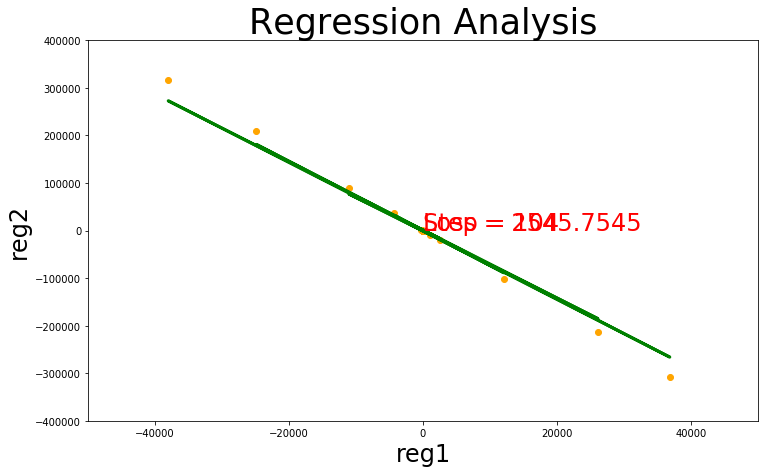

In [163]:
reg1_1 = torch.from_numpy(reg1)
reg2_1 = torch.from_numpy(reg2)
reg1_1 = reg1_1.double()
net1 = Net(n_feature=21, n_hidden=2, n_output=21)     # define the network

optimizer1 = torch.optim.SGD(net1.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
net1 = net1.double()
my_images = []
fig1, ax = plt.subplots(figsize=(12,7))

for t in range(105):
  
    
    predication = net1(reg1_1)
    loss1 = loss_func(predication,reg2_1)
    optimizer1.zero_grad()   # clear gradients for next train
    loss1.backward()         # backpropagation, compute gradients
    optimizer1.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('reg1', fontsize=24)
    ax.set_ylabel('reg2', fontsize=24)
    ax.set_xlim(-50000, 50000)
    ax.set_ylim(-400000, 400000)
    ax.scatter(reg1_1.data.numpy(), reg2_1.data.numpy(), color = "orange")
    ax.plot(reg1_1.data.numpy(), predication.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig1.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig1.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)

In [159]:
x_n = np.linspace(0,1,100)
y1_n, y2_n = function_gen(x, a,b,c,d)

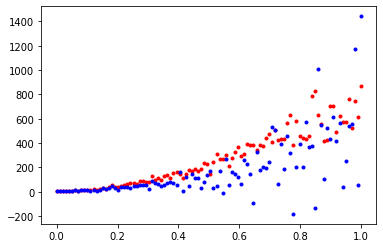

In [164]:
plt.plot(x_n,y1_n,'r.')
plt.plot(x_n,y2_n,'b.')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


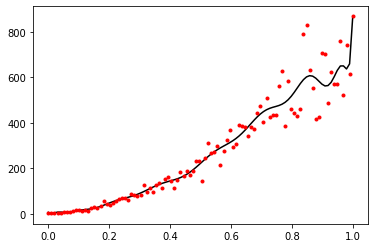

In [165]:
reg1_n = np.polyfit(x_n,y1_n,20)
ry1_n = np.polyval(reg1_n,x_n)
plt.plot(x_n,ry1_n,'k-')
plt.plot(x_n,y1_n,'r.')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


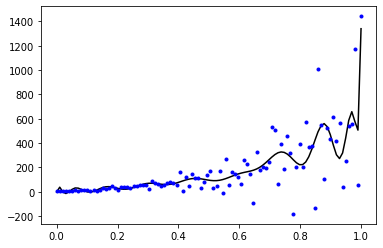

In [169]:
reg2_n = np.polyfit(x_n,y2_n,20)
ry2_n = np.polyval(reg2_n,x_n)
plt.plot(x_n,ry2_n,'k-')
plt.plot(x_n,y2_n,'b.')

array([ 3.60667803e+12, -2.99561900e+13,  1.10401721e+14, -2.33658831e+14,
        3.00180937e+14, -2.05498042e+14, -1.64259631e+13,  2.07830687e+14,
       -2.57062244e+14,  1.90339229e+14, -9.83212507e+13,  3.70329706e+13,
       -1.02885592e+13,  2.09744754e+12, -3.08114078e+11,  3.15822925e+10,
       -2.14577545e+09,  8.89485894e+07, -1.94398768e+06,  1.63403768e+04,
       -1.57604764e+00])

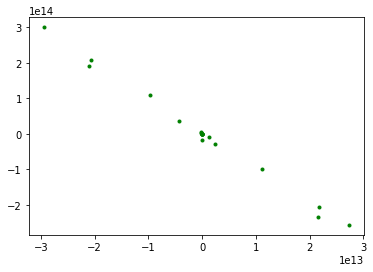

In [168]:
plt.plot(reg1_n,reg2_n,'g.')
reg2_n
